## Imports and variables 

In [43]:
# loading Game
import gym
#env = gym.make('Pong-ram-v0')
env = gym.make('Pong-v0')
env.reset()

# Setting training parmaters
max_frames = 200
score_requirement = 1
inital_games = 200


# standard modules 
import numpy as np
import random 
from collections import Counter
from statistics import mean, median

# keras import
from keras.models import Sequential
from keras.layers import Dense, Flatten  
from keras.models import load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D

# list of actions
ACTION_MEANING = {
    0 : "NOOP",
    1 : "FIRE",
    2 : "UP",
    3 : "RIGHT",
    4 : "LEFT",
    5 : "DOWN",
    6 : "UPRIGHT",
    7 : "UPLEFT",
    8 : "DOWNRIGHT",
    9 : "DOWNLEFT",
    10 : "UPFIRE",
    11 : "RIGHTFIRE",
    12 : "LEFTFIRE",
    13 : "DOWNFIRE",
    14 : "UPRIGHTFIRE",
    15 : "UPLEFTFIRE",
    16 : "DOWNRIGHTFIRE",
    17 : "DOWNLEFTFIRE",
}
UP = 2
DOWN = 5


## function that randomly returns up or down
def Pong_random_action():
    r = random.randrange(0,2)
    if r == 0:
        return UP
    else:
        return DOWN



def random_action():
    r = random.randrange(0,2)
    if r == 0:
        return UP
    elif r == 1:
        return DOWN

    return 0

def tobits(act):
    if act == 2:
        # action was up
        return 1
    elif act == 5:
        # action was down
        return -1
    else:
        # action was noop
        return 0

In [49]:

def play_game():
    '''
    A function that allows users to play the game using keyboward inputs. 
    'W' for up, 'D' for down , 'return' for no operation and'Q' to quit
    '''
    for ep in range(inital_games):
        env.reset()
        for t in range(200):
            env.render()
            print("Frame #:",t)
            action = str(input())
            if action == "q":
                env.close()
                return 
            
            action = 2 if action == "w" else 5 if action =="s" else 0
            
            observation, reward, done, info = env.step(action)
            
            print("T: ",t,"\tAction : ",ACTION_MEANING[action])
            if done:
                break
 


In [51]:
# test the set of action of the game one frame at a time
#play_game()



In [45]:
def initial_population():
    training_data = []
    scores = []
    accepted_scores = []
    
    for episode in range(inital_games):
        score = 0
        game_memory = []
        observation = env.reset()

        for _ in range(max_frames):
            # playing an game until max frames reached or game is done
            
            #env.render() ## un comment to run the game
            action = random_action()
            game_memory.append([observation,tobits(action)])
            
            observation, reward, done, info = env.step(action)

            
            score += reward
            
            if done:
                break

        print("=> Game #",episode+1,"\tScore: ",score)
        
        if score >= score_requirement:
            accepted_scores.append(score)
            
            for data in game_memory:                
                training_data.append([data[0],data[1]])
                
        scores.append(score)
    
    training_data_save = np.array(training_data)
    np.save('data1.npy', training_data_save) 

    print("Accepted score: ",accepted_scores)
    
    print("\nAverage scores: ",mean(scores))
    print("Average accepted score: ",mean(accepted_scores))
    print("Median accepted score: ",median(accepted_scores))
    print(Counter(accepted_scores))
    env.close()

    return training_data

In [46]:
Dataset = initial_population()

=> Game # 1 	Score:  -3.0
=> Game # 2 	Score:  -3.0
=> Game # 3 	Score:  -3.0
=> Game # 4 	Score:  -1.0
=> Game # 5 	Score:  -1.0
=> Game # 6 	Score:  -3.0
=> Game # 7 	Score:  -3.0
=> Game # 8 	Score:  -3.0
=> Game # 9 	Score:  -3.0
=> Game # 10 	Score:  -3.0
=> Game # 11 	Score:  0.0
=> Game # 12 	Score:  -3.0
=> Game # 13 	Score:  -3.0
=> Game # 14 	Score:  -2.0
=> Game # 15 	Score:  -3.0
=> Game # 16 	Score:  -3.0
=> Game # 17 	Score:  -3.0
=> Game # 18 	Score:  -2.0
=> Game # 19 	Score:  -3.0
=> Game # 20 	Score:  -3.0
=> Game # 21 	Score:  -3.0
=> Game # 22 	Score:  -3.0
=> Game # 23 	Score:  -3.0
=> Game # 24 	Score:  -1.0
=> Game # 25 	Score:  -3.0
=> Game # 26 	Score:  -3.0
=> Game # 27 	Score:  -3.0
=> Game # 28 	Score:  -1.0
=> Game # 29 	Score:  -3.0
=> Game # 30 	Score:  -1.0
=> Game # 31 	Score:  -3.0
=> Game # 32 	Score:  -3.0
=> Game # 33 	Score:  -3.0
=> Game # 34 	Score:  -1.0
=> Game # 35 	Score:  -3.0
=> Game # 36 	Score:  -3.0
=> Game # 37 	Score:  -3.0
=> Game # 3

In [11]:
from PIL import Image
import matplotlib.pyplot as plt


Size of dataset:  600


TypeError: Invalid dimensions for image data

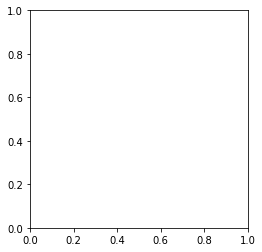

In [47]:
print("Size of dataset: ",len(Dataset))

def process_data(datum):
    downsample = np.mean(datum[:, ::2, ::2], axis=3)
    return downsample.reshape(*downsample.shape, 1)

#Dataset = process_data(Dataset)

img = Dataset[60][0]

plt.imshow(img)


In [72]:
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(105, 80, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dense(256, activation="relu", kernel_initializer="uniform"))
# model.add(Dense(128, activation="relu", kernel_initializer="uniform"))
# model.add(Dense(64, activation="relu", kernel_initializer="uniform"))
model.add(Flatten())
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
env.observation_space.shape

(128,)

In [73]:
X_train = np.array([i[0] for i in Dataset])

def f(x):
    return x if x == 1 else 0

y_train = np.array([f(i[1]) for i in Dataset])
y_train = y_train.reshape(y_train.shape[0], 1)
print(y_train.shape)
print(X_train[0].shape)
model.summary()

(2700, 1)
(210, 160, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 210, 160, 256)     7168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 105, 80, 256)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2150400)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2150401   
Total params: 2,157,569
Trainable params: 2,157,569
Non-trainable params: 0
_________________________________________________________________


In [10]:
np.unique(y_train)

array([-1,  1])

In [75]:
model.fit(process_data(X_train), y_train, verbose=1,epoch=5)


TypeError: Unrecognized keyword arguments: {'epoch': 5}

# work from saturday

In [ ]:
## From satudary

In [29]:
def random_game():
    for epsiode in range(5):
        print("========== Episode #",epsiode+1," ==========")
        env.reset()
        for t in range(max_frames):
            env.render()
            
            a = str(input())
            if a == 'q':
                env.close()
                return
            elif a == 'n':
                break
                
            action = env.action_space.sample()
            observation, reward, done, info = env.step(action)
            
            print("T: ",t,"\tAction : ",ACTION_MEANING[action])

            
                
            if done:
                break

                


def initial_population():
    training_data = []
    scores = []
    accepted_scores = []
    
    for episode in range(inital_games):
        score = 0
        game_memory = []
        prev_observation = []
        for _ in range(max_frames):
            ##env.render()
            action = Pong_random_action()
            #action = env.action_space.sample()
            observation, reward, done, info = env.step(action)

            if len(prev_observation) > 0:
                game_memory.append([prev_observation,action])
            
            prev_observation = observation
            
            score += reward
            
            if done:
                break

        print("=> Episode #",episode+1,"\tScore: ",score)
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:
                output = None
                if data[1] == 2:# action up
                    output = 1
                if data[1] == 5: # action down
                    output = 0
                    
                training_data.append([data[0],output])
                
        env.reset()
        scores.append(score)
    
    training_data_save = np.array(training_data)
    np.save('saved_R.npy',training_data_save)
        
    print("Accepted score: ",accepted_scores)
    
    print("\nAverage scores: ",mean(scores))
    print("Average accepted score: ",mean(accepted_scores))
    print("Median accepted score: ",median(accepted_scores))
    print(Counter(accepted_scores))

    return training_data
        
        
        
        
        

In [30]:
training_data_set = initial_population()

=> Episode # 1 	Score:  -3.0
=> Episode # 2 	Score:  -3.0
=> Episode # 3 	Score:  -3.0
=> Episode # 4 	Score:  -3.0
=> Episode # 5 	Score:  -3.0
=> Episode # 6 	Score:  -3.0
=> Episode # 7 	Score:  -3.0
=> Episode # 8 	Score:  -3.0
=> Episode # 9 	Score:  -3.0
=> Episode # 10 	Score:  -2.0
=> Episode # 11 	Score:  -2.0
=> Episode # 12 	Score:  -3.0
=> Episode # 13 	Score:  -3.0
=> Episode # 14 	Score:  -3.0
=> Episode # 15 	Score:  -3.0
=> Episode # 16 	Score:  -2.0
=> Episode # 17 	Score:  0.0
=> Episode # 18 	Score:  -3.0
=> Episode # 19 	Score:  -2.0
=> Episode # 20 	Score:  -2.0
=> Episode # 21 	Score:  -1.0
=> Episode # 22 	Score:  -3.0
=> Episode # 23 	Score:  -3.0
=> Episode # 24 	Score:  -2.0
=> Episode # 25 	Score:  -3.0
=> Episode # 26 	Score:  -3.0
=> Episode # 27 	Score:  -3.0
=> Episode # 28 	Score:  -3.0
=> Episode # 29 	Score:  -3.0
=> Episode # 30 	Score:  -3.0
=> Episode # 31 	Score:  -3.0
=> Episode # 32 	Score:  -2.0
=> Episode # 33 	Score:  -1.0
=> Episode # 34 	Sco

In [4]:
print("Length of training data: ",len(training_data_set))
training_data_set = np.array(training_data_set)
np.array(training_data_set[0][0]).shape


Length of training data:  9154


(128,)

In [5]:
print("Training dataset: ",np.array(training_data_set).shape)
print("Target: ",env.observation_space.shape)


X_train = np.array([i[0] for i in training_data_set])
y_train = np.array([i[1] for i in training_data_set])


Training dataset:  (9154, 2)
Target:  (128,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten  

Using TensorFlow backend.


In [7]:
# defines the model
model = Sequential()
model.add(Dense(128, input_shape=env.observation_space.shape, activation="relu", kernel_initializer="uniform"))
model.add(Dense(256, activation="relu", kernel_initializer="uniform"))
model.add(Dense(128, activation="relu", kernel_initializer="uniform"))
model.add(Dense(64, activation="relu", kernel_initializer="uniform"))
model.add(Dense(2, activation="linear", kernel_initializer="uniform"))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


In [8]:
# training sets


model.fit([X_train], y_train, epochs=10, batch_size=32,verbose=1)

#training_data_set[0][0].shape

Epoch 1/10
9154/9154 [==============================] - 1s 124us/step - loss: 0.2538 - acc: 0.5067
Epoch 2/10
9154/9154 [==============================] - 1s 92us/step - loss: 0.2511 - acc: 0.5003
Epoch 3/10
9154/9154 [==============================] - 1s 94us/step - loss: 0.2505 - acc: 0.5098
Epoch 4/10
9154/9154 [==============================] - 1s 83us/step - loss: 0.2511 - acc: 0.5039
Epoch 5/10
9154/9154 [==============================] - 1s 121us/step - loss: 0.2506 - acc: 0.4983
Epoch 6/10
9154/9154 [==============================] - 1s 93us/step - loss: 0.2505 - acc: 0.5010
Epoch 7/10
9154/9154 [==============================] - 1s 111us/step - loss: 0.2503 - acc: 0.5038
Epoch 8/10
9154/9154 [==============================] - 1s 113us/step - loss: 0.2508 - acc: 0.4957
Epoch 9/10
9154/9154 [==============================] - 1s 115us/step - loss: 0.2505 - acc: 0.4942
Epoch 10/10
9154/9154 [==============================] - 1s 103us/step - loss: 0.2504 - acc: 0.4925


**Uncomment the cell bellow to save the model**

In [28]:
#from keras.models import load_model

#model.save("FirstModel_withRandom.h5")

#model = load_model('FirstModel_withRandom.h5')

yuoo = None

In [24]:
def binary_to_action(bit):
    if bit == [0,1]:
        return 5
    else:
        return 2

def game_with_model():
    scores = []
    choices = []
    for each_game in range(10):
        score = 0
        game_memory = []
        prev_obs = []
        env.reset()
        for _ in range(max_frames):
            env.render()
            if len(prev_obs) == 0:
                action = Pong_random_action()
            else:
                #predict based on our model
                #print("obs shape: ",prev_obs.shape)
                #print(prev_obs)
                action = model.predict([[prev_obs]])
            
            choices.append(action)
            observation, reward, done, info = env.step(action)
            prev_obs = observation
            game_memory.append([observation,action])
            score += reward
            
            if done:
                break
        scores.append(score)
        
    print("\nAverage scores: ",mean(scores))
    print("Chose UP ",choices.count(2)/len(choices)," chose Down ",choices.count(5)/len(choices))


In [25]:
game_with_model()

In [26]:
env.close()

In [27]:
model.predict(yuoo)

NameError: name 'yuoo' is not defined


# Run the cell before the code

In [56]:
# standard modules 
import numpy as np
import random 
from collections import Counter
from statistics import mean, median

# keras import
from keras.models import Sequential
from keras.layers import Dense, Flatten  
from keras.models import load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D

# list of actions
ACTION_MEANING = {
    0 : "NOOP",
    1 : "FIRE",
    2 : "UP",
    3 : "RIGHT",
    4 : "LEFT",
    5 : "DOWN",
    6 : "UPRIGHT",
    7 : "UPLEFT",
    8 : "DOWNRIGHT",
    9 : "DOWNLEFT",
    10 : "UPFIRE",
    11 : "RIGHTFIRE",
    12 : "LEFTFIRE",
    13 : "DOWNFIRE",
    14 : "UPRIGHTFIRE",
    15 : "UPLEFTFIRE",
    16 : "DOWNRIGHTFIRE",
    17 : "DOWNLEFTFIRE",
}
UP = 2
DOWN = 5


## function that randomly returns up or down
def Pong_random_action():
    r = random.randrange(0,2)
    if r == 0:
        return UP
    else:
        return DOWN
